In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:

# Load the dataset
df = pd.read_csv("iris.csv")

# Display basic dataset info
print("Dataset Head:")
print(df.head())
print("Dataset Description:")
print(df.describe())


Dataset Head:
   sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1
Dataset Description:
       sepal_length  sepal_width  petal_length  petal_width  species_id
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    2.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    1.000000
25%        5.100000     2.800000      1.600000     0.300000    1.000000
50%        5.800000     3.000000      4.350000     1.300000    2.000000
75%  

In [3]:

# Define features and target variable
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species_id'

X = df[features]
y = df[target]

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:

# Define and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(12, 8), activation='relu', solver='adam', max_iter=600, random_state=42)
mlp.fit(X_train_scaled, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(12, 8), max_iter=600, random_state=42)

Model Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



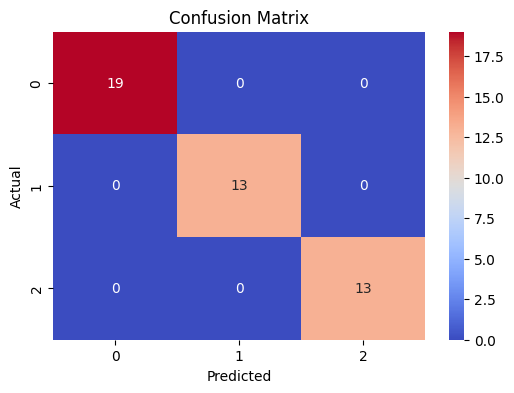

In [6]:

# Predictions and evaluations
y_pred = mlp.predict(X_test_scaled)

# Accuracy and report
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
